#  Working with Raster Data - Layerstack and Spectral indices

In [1]:
# Import glob for file handling
import os
from glob import glob

In [2]:
# listing all file names starting with B
glob("L5_data/Subsetted/*B*.tif")

['L5_data/Subsetted\\B1.tif',
 'L5_data/Subsetted\\B2.tif',
 'L5_data/Subsetted\\B3.tif',
 'L5_data/Subsetted\\B4.tif',
 'L5_data/Subsetted\\B5.tif',
 'L5_data/Subsetted\\B6.tif',
 'L5_data/Subsetted\\B7.tif']

In [3]:
# listing only optical bands B
glob("L5_data/Subsetted/*B[1:2:3:4:5:7]*.tif")

['L5_data/Subsetted\\B1.tif',
 'L5_data/Subsetted\\B2.tif',
 'L5_data/Subsetted\\B3.tif',
 'L5_data/Subsetted\\B4.tif',
 'L5_data/Subsetted\\B5.tif',
 'L5_data/Subsetted\\B7.tif']

In [4]:
opticalBands = glob("L5_data/Subsetted/*B[1:2:3:4:5:7]*.tif")

In [5]:
opticalBands

['L5_data/Subsetted\\B1.tif',
 'L5_data/Subsetted\\B2.tif',
 'L5_data/Subsetted\\B3.tif',
 'L5_data/Subsetted\\B4.tif',
 'L5_data/Subsetted\\B5.tif',
 'L5_data/Subsetted\\B7.tif']

In [6]:
import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [7]:
band1 = rio.open(opticalBands[0])

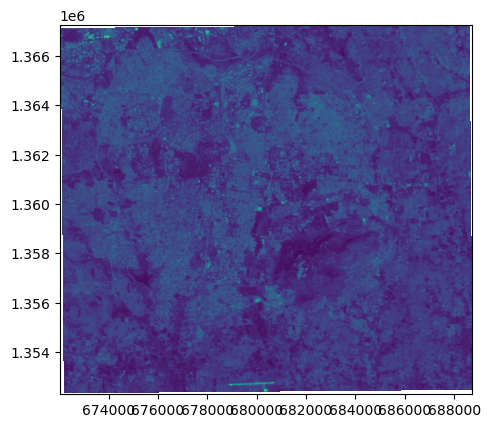

<Axes: >

In [8]:
show((band1))

In [9]:
#importing earthpy library for stacking Bands
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et

In [10]:
#giving output name for the stacked image
outStacked = "L5_data/Subsetted/LayerStacked.tif"

In [11]:
#land_stack, land_meta = es.stack(opticalBands,outStacked)
arr_st, meta = es.stack(opticalBands, out_path = outStacked)

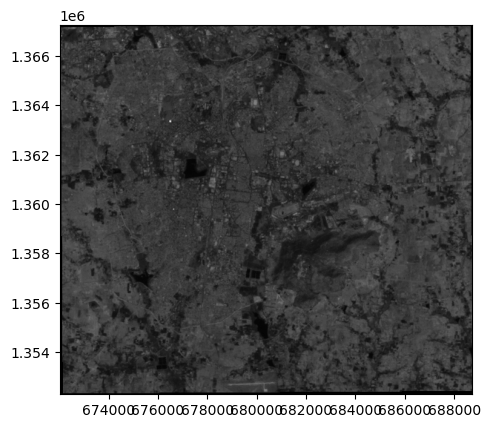

<Axes: >

In [12]:
# Reading Stacked Bands
stack = rio.open(outStacked)
show((stack,6), cmap = 'gray')

In [13]:
stack.crs

CRS.from_epsg(32643)

In [14]:
#counting number of bands stacked in image
stack.count

6

**Plot all bands using earthpy**

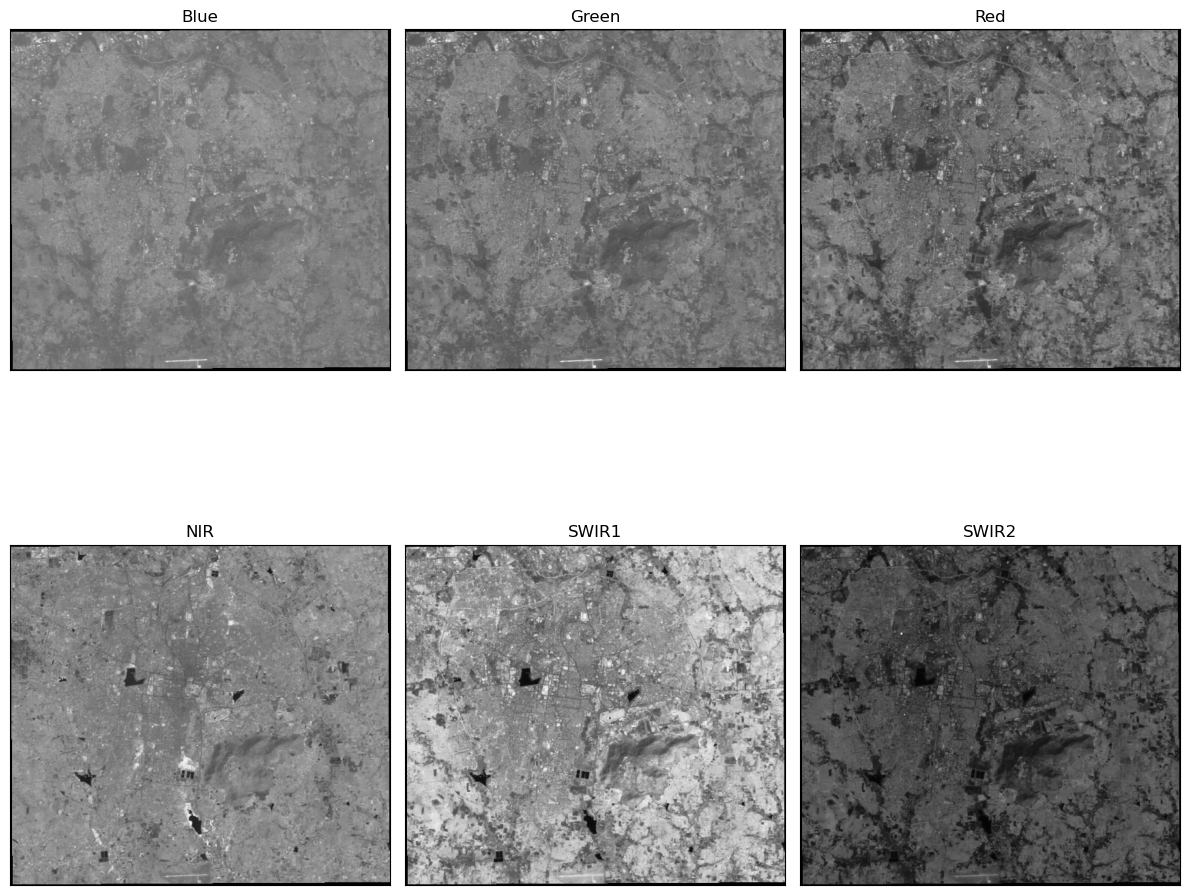

In [15]:
path = "L5_data/Subsetted/LayerStacked.tif"
with rio.open(path) as src:
    layerstack = src.read() 
band_titles = ["Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]
ep.plot_bands(layerstack,title=band_titles, cbar=False)
plt.show()

In [16]:
# Generating Color Composites
# True Color Composite
# [3,2,1]---> [2,1,0]

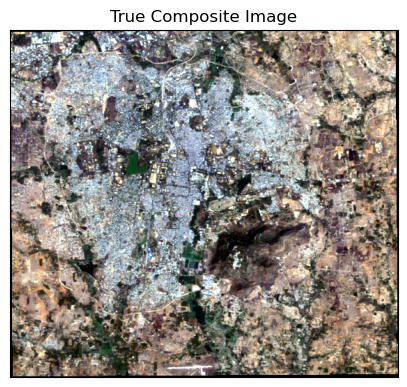

In [17]:
path = "L5_data/Subsetted/LayerStacked.tif"

with rio.open(path) as myfile:
    landsat5_stack = myfile.read() 

ep.plot_rgb(landsat5_stack,
            rgb=(2, 1, 0), 
            stretch=True,
            figsize=(5, 6),
            title="True Composite Image")
plt.show()

In [18]:
# False Color Composite
# [4,3,2] --> [3,2,1]

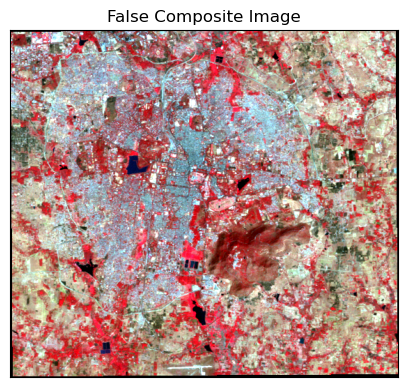

In [19]:
path = "L5_data/Subsetted/LayerStacked.tif"

with rio.open(path) as myfile:
    landsat5_stack = myfile.read() 

ep.plot_rgb(landsat5_stack,
            rgb=(3, 2, 1), 
            stretch=True,
            figsize=(5, 6),
            title="False Composite Image")
plt.show()

In [20]:
# Explore the Range of Values in the Data

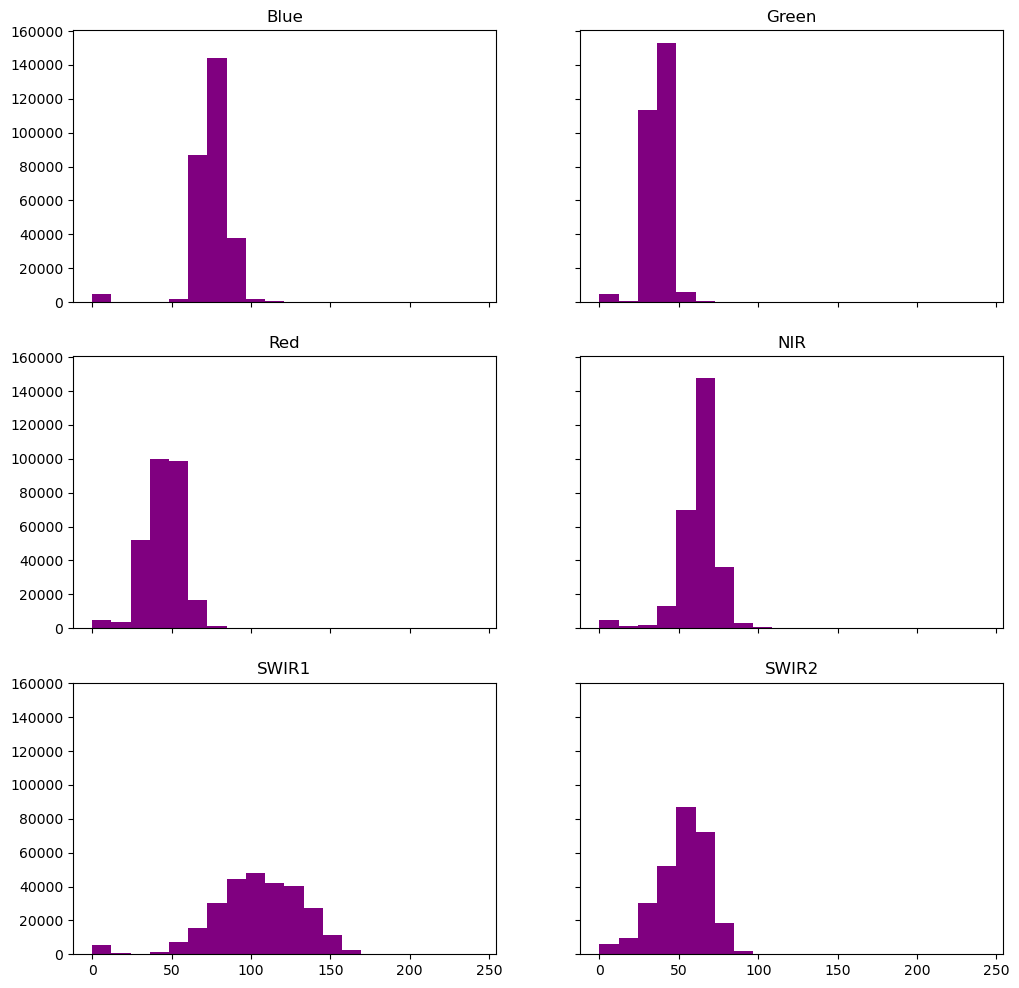

In [21]:
ep.hist(landsat5_stack, title=["Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"], cols=2)
plt.show()

In [22]:
# Plot All Histograms in a Stack With Custom Titles and Colors

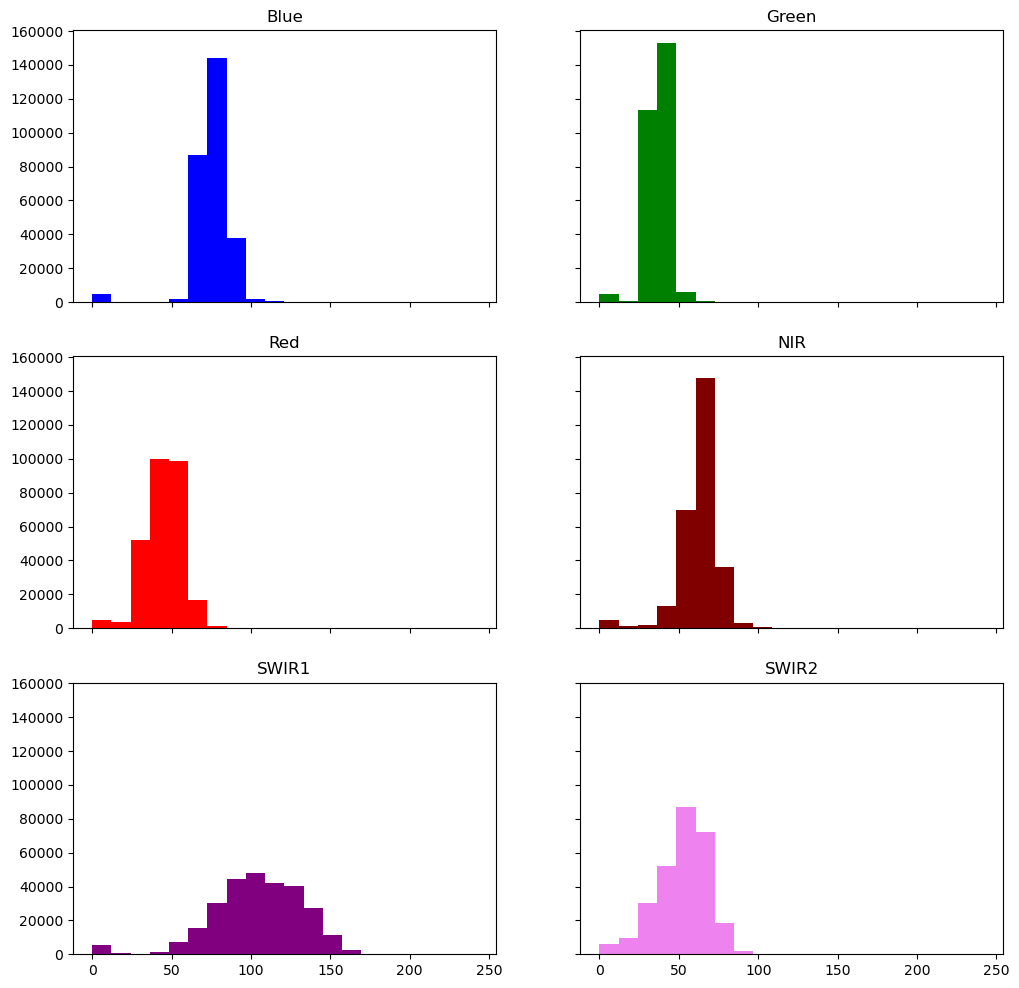

In [23]:
# Create the list of color names for each band
colors_list = ["Blue","Green","Red","Maroon","Purple","Violet"]
bandName = ["Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

ep.hist(landsat5_stack, colors=colors_list, title=bandName)
plt.show()

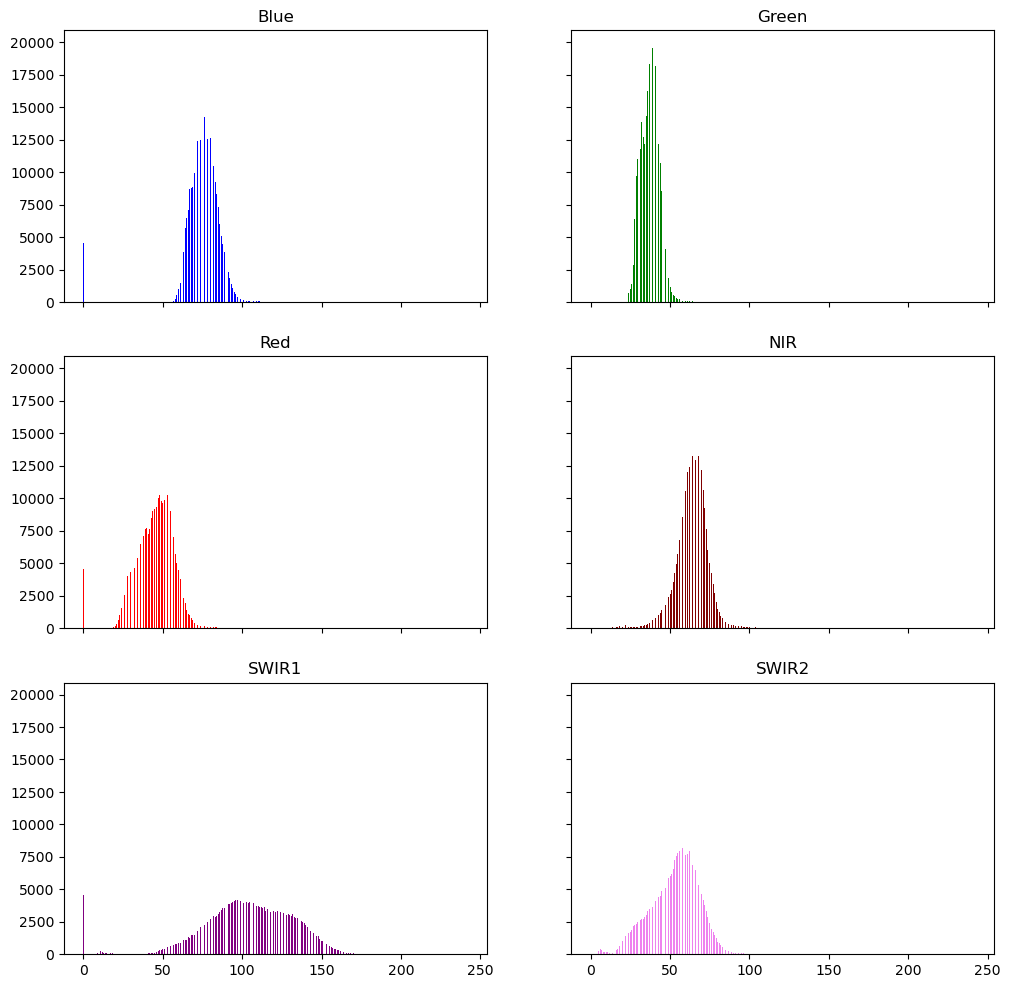

In [24]:
# Changing BIN Size
# Create the list of color names for each band
colors_list = ["Blue","Green","Red","Maroon","Purple","Violet"]
bandName = ["Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

ep.hist(landsat5_stack, colors=colors_list, title=bandName, bins=500)
plt.show()

In [25]:
# Raster Algebra ---- Spectral Indices

In [26]:
path = "L5_data/Subsetted/LayerStacked.tif"

In [27]:
bands = rio.open(path)

In [28]:
redband = bands.read(2)
redband

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

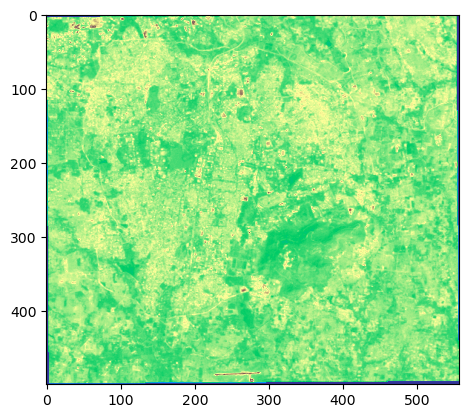

<Axes: >

In [29]:
show(redband, cmap='terrain')

In [30]:
nirband = bands.read(3)

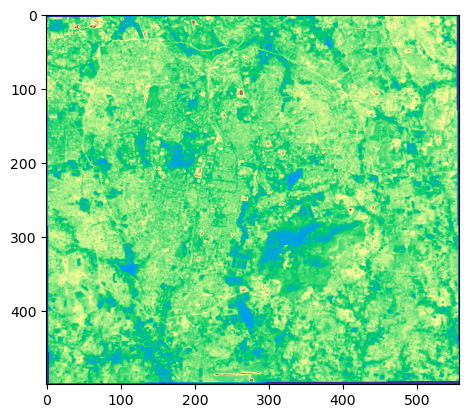

<Axes: >

In [31]:
show(nirband, cmap='terrain')

In [32]:
# Convert DN values from Int to floats
red = redband.astype('f4')
nir = nirband.astype('f4')
red

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
#Setting Numpy Parameter to Ignore Divide by Zero Error
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [34]:
# Calculate NDVI using numpy arrays
ndvi = (nir - red) / (nir + red)

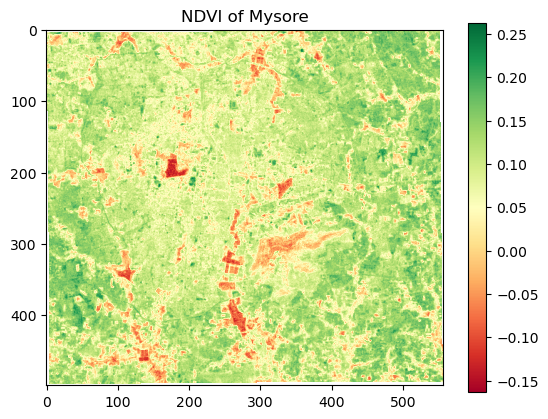

In [35]:
# Plotting NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.title("NDVI of Mysore")
plt.colorbar()

In [36]:
# Make use of BAND 6 and Find Temperature

In [37]:
thermalBands = glob("L5_data/Subsetted/*B[6]*.tif")

In [38]:
thermalBands

['L5_data/Subsetted\\B6.tif']

In [39]:
thermal = rio.open(thermalBands[0])

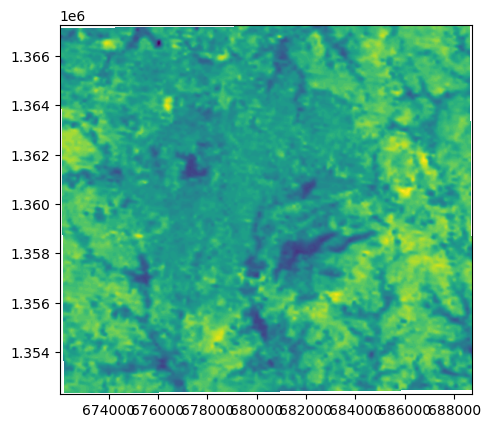

<Axes: >

In [40]:
show(thermal)

In [41]:
thermalband = thermal.read(1)
thermalband

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [42]:
thermal = thermalband.astype('f4')
thermal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
from rasterstats import zonal_stats
import numpy as np

In [44]:
with rio.open(thermalBands[0]) as src:
    # Get the raster data
    data = src.read(1)

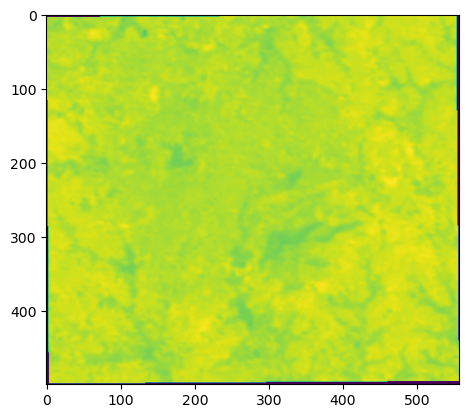

<Axes: >

In [45]:
show(data)

In [46]:
# Get the raster metadata
meta = src.meta
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 557,
 'height': 499,
 'count': 1,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(30.0, 0.0, 672015.0,
        0.0, -30.0, 1367265.0)}

In [47]:
radiance =((15.303 + 1.238)/255)*data
radiance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
tempInK = 1260.56/np.log(((607.76/radiance)+1)) -273

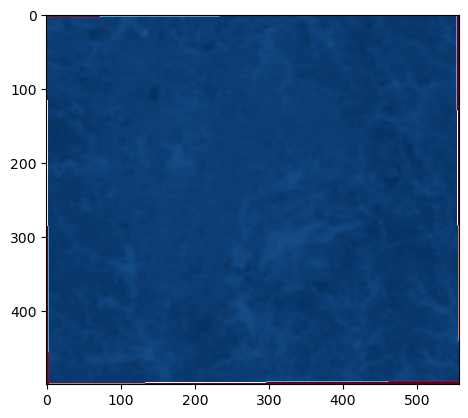

In [49]:
plt.imshow(tempInK,cmap = 'RdBu') 

In [50]:
with rio.open('L5_data/Subsetted/temperature.tif', 'w', **meta) as dst:
    dst.write(tempInK, 1)